In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
#import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV
import random

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sS = pd.read_csv("sampleSubmission.csv")

In [2]:
select_label = [0, 1, 2, 3]
select_habits = [0., 1.]

In [3]:
train

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力,推薦類型
0,1.0,957.0,0.000000,1.0,1.0,0.0,-2.0,0.0,1.0,1.0,1.0,0.0,-3.0,0.0,-3.0,肌力
1,0.0,987.0,19.879103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,error
2,1.0,49.0,20.878375,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,error
3,1.0,45.0,-28.543927,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,肌耐力
4,1.0,3245.0,0.000000,-3.0,-3.0,-4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26423,0.0,1848.0,0.000000,0.0,0.0,0.0,0.0,-5.0,0.0,0.0,0.0,1.0,0.0,0.0,-5.0,心肺
26424,0.0,31.0,-22.367858,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,心肺
26425,1.0,2269.0,0.000000,0.0,0.0,1.0,0.0,-4.0,-5.0,0.0,1.0,1.0,0.0,-5.0,1.0,錯誤
26426,1.0,3122.0,17.578125,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,肌耐力


In [4]:
test

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力
0,1.0,44.0,21.270529,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.0,44.0,25.433064,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,31.0,18.818924,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1.0,41.0,23.733238,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,37.0,19.073054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,1.0,27.0,23.875115,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
5004,0.0,24.0,29.558578,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
5005,0.0,37.0,19.651736,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5006,0.0,29.0,13.231170,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [5]:
feature_list = train.columns.tolist()

In [6]:
len(feature_list)

16

C:\Users\user\AppData\Local\Temp\ipykernel_8320\3860456955.py:10: UserWarning: Glyph 32908 (\N{CJK UNIFIED IDEOGRAPH-808C}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8320\3860456955.py:10: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8320\3860456955.py:10: UserWarning: Glyph 32784 (\N{CJK UNIFIED IDEOGRAPH-8010}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8320\3860456955.py:10: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8320\3860456955.py:10: UserWarning: Glyph 32954 (\N{CJK UNIFIED IDEOGRAPH-80BA}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8320\3860456955.py:10: UserWarning: Glyph 26580 (\N{CJK UNIFIED IDEOGRAPH-67D4}) missing from cur

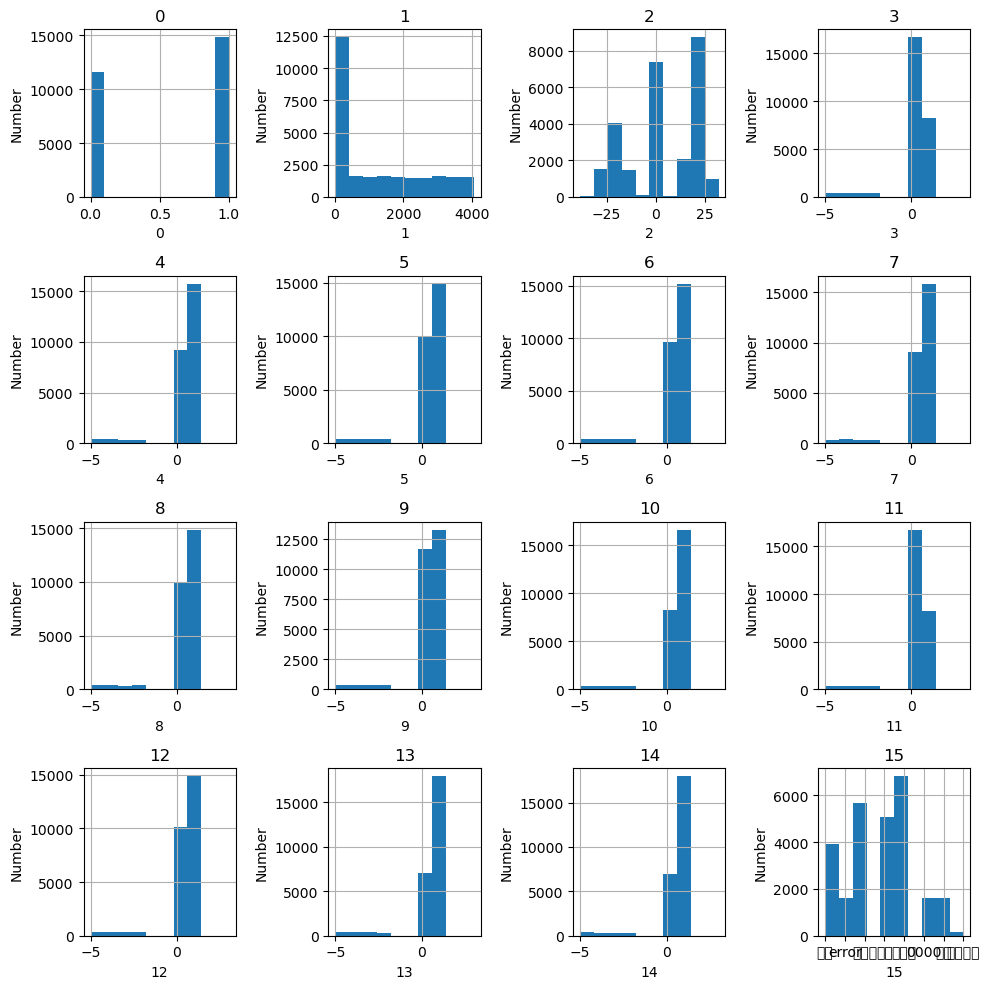

In [7]:
plt.figure(figsize=(10,10))

for i in range(0,16):
    
    plt.subplot(4,4,i+1)
    hist = train[feature_list[i]].hist()
    plt.title(str(i))
    plt.xlabel(str(i))
    plt.ylabel("Number")
    plt.tight_layout()
    
plt.show()

In [8]:
train['推薦類型'].replace(['肌力',"柔軟度","心肺","肌耐力"],[0,1,2,3] , inplace = True)

In [9]:
train = train[train['推薦類型'].isin(select_label)]
train = train[train['拳擊'].isin(select_habits)]
train = train[train['器材'].isin(select_habits)]
train = train[train['有氧'].isin(select_habits)]
train = train[train['舞蹈'].isin(select_habits)]
train = train[train['高強度間歇'].isin(select_habits)]
train = train[train['瑜伽'].isin(select_habits)]
train = train[train['肌力訓練'].isin(select_habits)]
train = train[train['燃脂'].isin(select_habits)]
train = train[train['減脂瘦身'].isin(select_habits)]
train = train[train['增加肌肉'].isin(select_habits)]
train = train[train['增強體魄'].isin(select_habits)]
train = train[train['舒緩壓力'].isin(select_habits)]
train = train[train['年齡']<70]
train = train[train['BMI']>10]

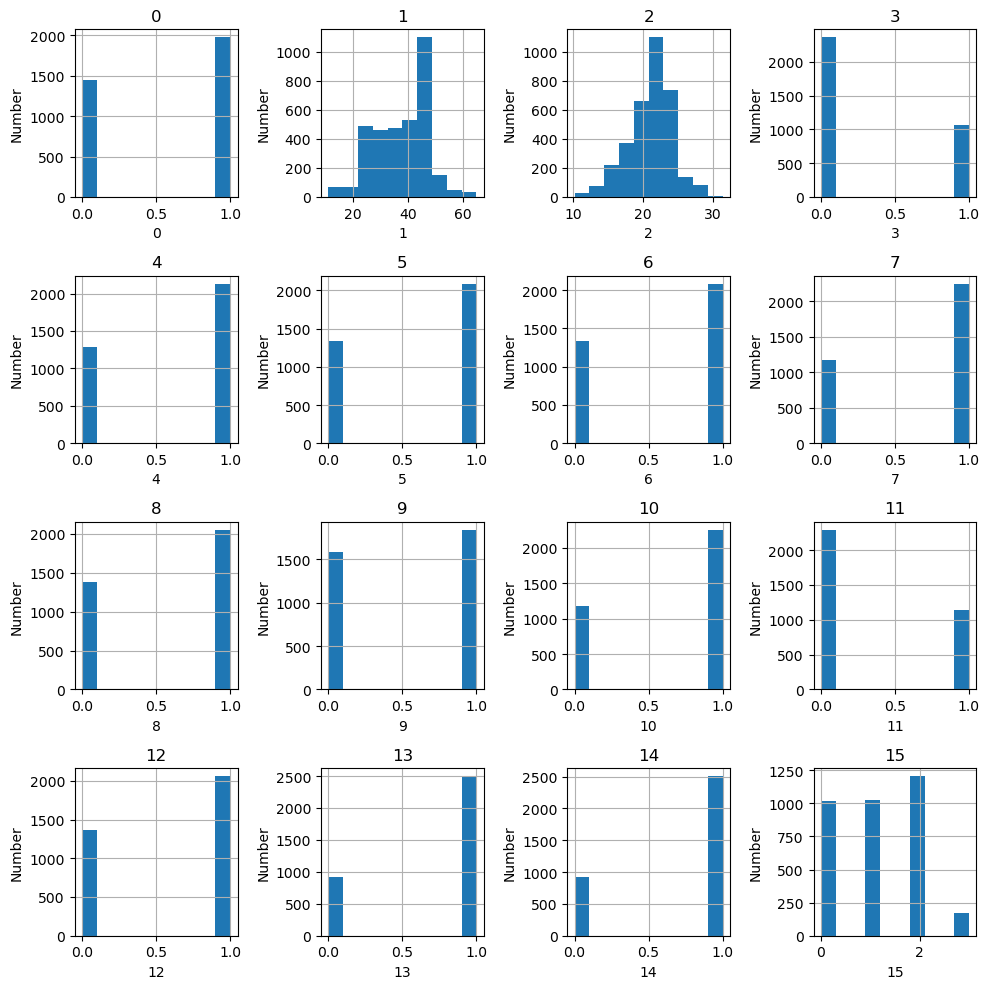

In [10]:
plt.figure(figsize=(10,10))

for i in range(0,16):
    
    plt.subplot(4,4,i+1)
    hist = train[feature_list[i]].hist()
    plt.title(str(i))
    plt.xlabel(str(i))
    plt.ylabel("Number")
    plt.tight_layout()
    
plt.show()

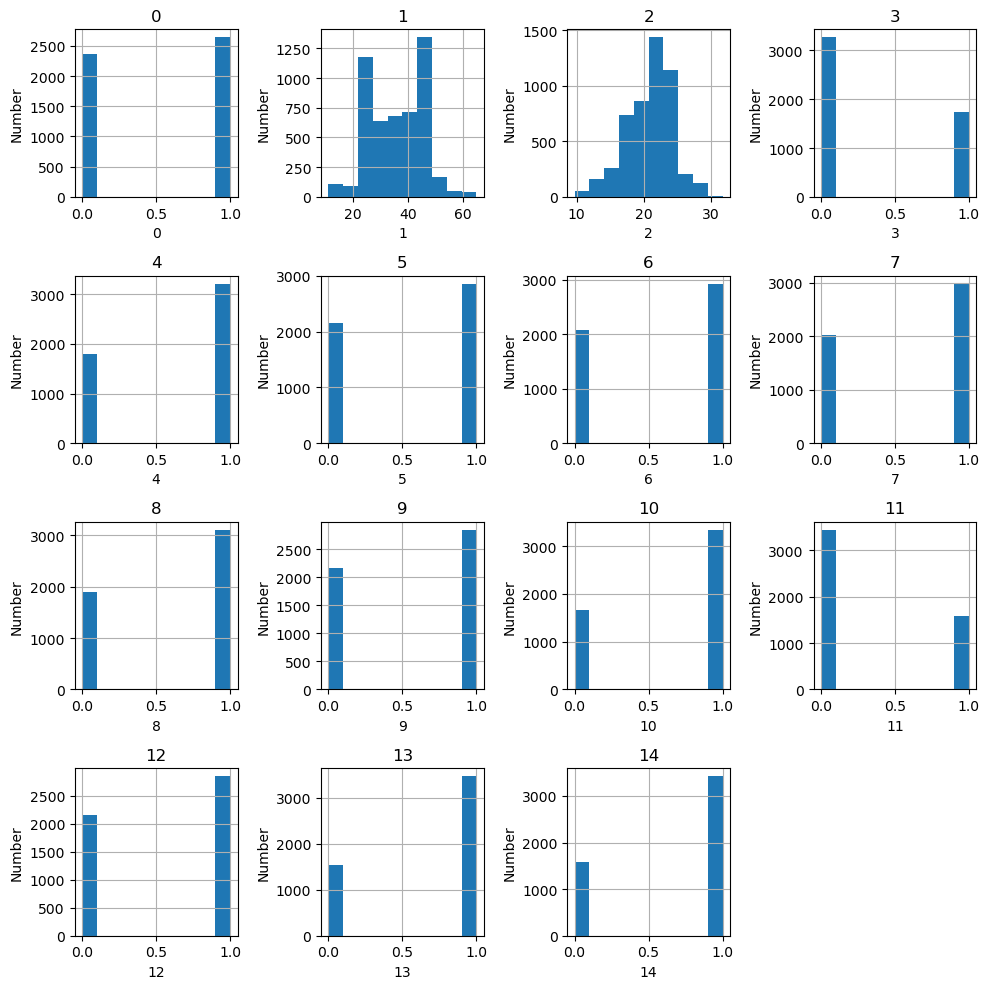

In [11]:
plt.figure(figsize=(10,10))

for i in range(0,15):
    
    plt.subplot(4,4,i+1)
    hist = test[feature_list[i]].hist()
    plt.title(str(i))
    plt.xlabel(str(i))
    plt.ylabel("Number")
    plt.tight_layout()
    
plt.show()

In [12]:
train['推薦類型'] = train['推薦類型'].astype("int64")
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 5 to 26416
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性別      3425 non-null   float64
 1   年齡      3425 non-null   float64
 2   BMI     3425 non-null   float64
 3   拳擊      3425 non-null   float64
 4   器材      3425 non-null   float64
 5   有氧      3425 non-null   float64
 6   舞蹈      3425 non-null   float64
 7   高強度間歇   3425 non-null   float64
 8   瑜伽      3425 non-null   float64
 9   肌力訓練    3425 non-null   float64
 10  燃脂      3425 non-null   float64
 11  減脂瘦身    3425 non-null   float64
 12  增加肌肉    3425 non-null   float64
 13  增強體魄    3425 non-null   float64
 14  舒緩壓力    3425 non-null   float64
 15  推薦類型    3425 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 454.9 KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性別      5008 non-null   float64
 1   年齡      5008 non-null   float64
 2   BMI     5008 non-null   float64
 3   拳擊      5008 non-null   float64
 4   器材      5008 non-null   float64
 5   有氧      5008 non-null   float64
 6   舞蹈      5008 non-null   float64
 7   高強度間歇   5008 non-null   float64
 8   瑜伽      5008 non-null   float64
 9   肌力訓練    5008 non-null   float64
 10  燃脂      5008 non-null   float64
 11  減脂瘦身    5008 non-null   float64
 12  增加肌肉    5008 non-null   float64
 13  增強體魄    5008 non-null   float64
 14  舒緩壓力    5008 non-null   float64
dtypes: float64(15)
memory usage: 587.0 KB


In [14]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categories = 'auto')
from sklearn.compose import ColumnTransformer
#Encode Country Column
ct = ColumnTransformer([("性別", OneHotEncoder(), [0])], remainder = 'passthrough')
trainh = ct.fit_transform(train)

trainh = pd.DataFrame(trainh)

trainh = trainh.rename(columns = {0:'女',1:'男',2:'年齡',3:'BMI',4:'拳擊',5:'器材',6:'有氧',7:'舞蹈',8:'高強度間歇',9:'瑜伽',10:'肌力訓練',11:'燃脂',12:'減脂瘦身',13:'增加肌肉',14:'增強體魄',15:'舒緩壓力', 16:'label'})

<AxesSubplot:>

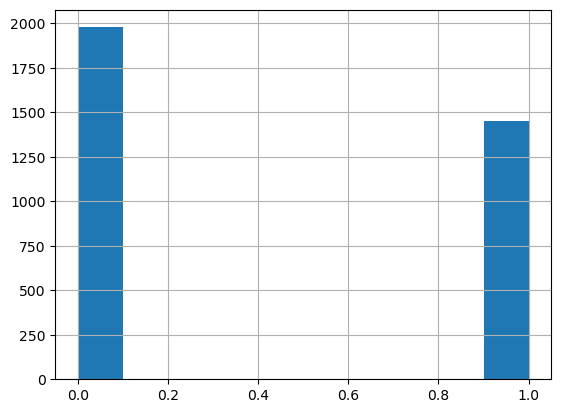

In [15]:
trainh["女"].hist()

<AxesSubplot:>

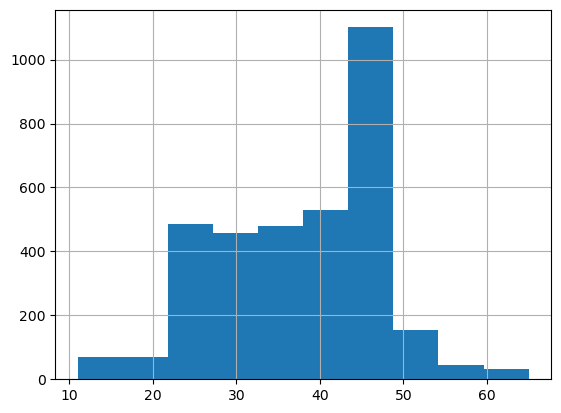

In [16]:
trainh["年齡"].hist()

In [17]:
X = trainh.drop(["label"], axis =1)
y = trainh["label"]

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV

0.0    1116
1.0    1116
2.0    1116
3.0    1116
Name: label, dtype: int64

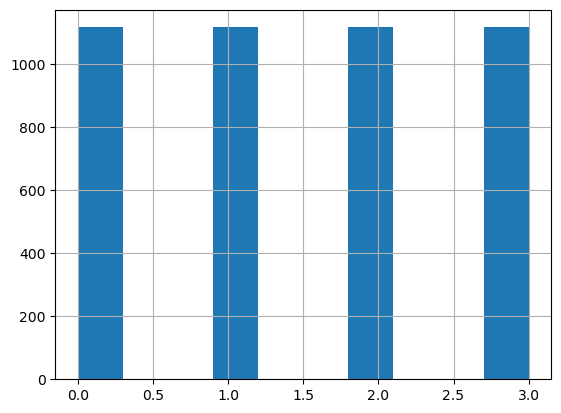

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
X_s, y_s =  TomekLinks().fit_resample(X, y)
X_s, y_s = SMOTE(random_state = 0).fit_resample(X_s,y_s)
y_s.hist()
y_s.value_counts()

In [20]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(
   X_s, y_s, test_size=0.33, random_state=42)

In [21]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF.score(X_val,y_val)

0.8853459972862958

In [22]:
trainh["年齡"].value_counts().sort_index()

11.0      7
12.0      8
13.0     15
14.0      8
15.0     13
16.0     19
17.0     10
18.0     17
19.0     20
20.0     15
21.0      9
22.0     57
23.0     62
24.0     58
25.0     45
26.0     89
27.0    175
28.0     80
29.0     92
30.0     93
31.0    130
32.0     64
33.0    148
34.0     85
35.0     79
36.0     83
37.0     84
38.0     98
39.0     71
40.0     69
41.0     84
42.0    112
43.0     95
44.0    142
45.0    167
46.0    352
47.0    294
48.0    146
49.0     47
50.0     63
51.0     11
52.0     10
53.0     12
54.0     11
55.0      9
56.0     16
57.0      7
58.0      9
59.0      4
60.0      4
61.0     16
62.0      5
63.0      1
64.0      4
65.0      1
Name: 年齡, dtype: int64

In [23]:
trainh["BMI"].value_counts().sort_index()

10.179465    1
10.659033    1
10.710460    1
10.772045    1
10.774532    1
            ..
29.087927    1
29.702576    1
30.534343    1
30.980264    1
31.345358    1
Name: BMI, Length: 2535, dtype: int64

In [24]:
trainh["年齡"] = pd.cut(trainh["年齡"], bins=(10,15,20,25,30,35,40,45,50,55,60,65),labels= ['0','1','2','3','4','5','6','7','8','9','10'])
trainh["BMI"] = pd.cut(trainh["BMI"], bins=(0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32),labels= ['0','1','2','3','4','5','6','7','8','9','10',"11","12","13","14","15","16","17","18","19","20","21"])   

In [25]:
trainh["年齡"].value_counts().sort_index() 

0      51
1      81
2     231
3     529
4     506
5     405
6     600
7     902
8      53
9      40
10     27
Name: 年齡, dtype: int64

In [26]:
trainh["BMI"].value_counts().sort_index() 

0       9
1      15
2      16
3      42
4      56
5      71
6     165
7     213
8     230
9     361
10    229
11    320
12    789
13    471
14    209
15     76
16     58
17     58
18     32
19      2
20      2
21      1
Name: BMI, dtype: int64

In [27]:
trainh["年齡"] =trainh["年齡"].astype(int)

In [28]:
from sklearn.preprocessing import MinMaxScaler
X = trainh.drop(["label"], axis =1)
y = trainh["label"]

scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_s, y_s =  TomekLinks().fit_resample(X_scaled, y)
X_s, y_s = SMOTE(random_state = 0).fit_resample(X_s,y_s)

X_train, X_val, y_train, y_val = train_test_split(
   X_s, y_s, test_size=0.33, random_state=42)

In [29]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF.score(X_val,y_val)

0.86743711760707

In [30]:
from sklearn.svm import SVC

In [31]:
SV = SVC(C = 80,gamma =1.8)
SV.fit(X_train,y_train)
SV.score(X_val,y_val)

0.8783140720598233

In [32]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
def accuracy_score(y_val,y_pred):
    Sum = 0
    y_val = y_val.tolist()
    y_pred = y_pred.tolist()
    for i in range(len(y_pred)):
        if y_val[i] == y_pred[i]:
            Sum+=1
    score = Sum/len(y_pred)
    
    return score


rnd_clf = RandomForestClassifier(random_state=42,n_estimators=400)
xgb_clf =  XGBClassifier(random_state=42, n_estimators=400)
svc_clf = SVC(C= 90, gamma = 1.8)

voting_clf = VotingClassifier(estimators=[('xg', xgb_clf), ('rf', rnd_clf), ('sv', svc_clf)],voting='hard')
scores_1 = cross_val_score(rnd_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
scores_2 = cross_val_score(xgb_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
scores_3 = cross_val_score(svc_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
scores = cross_val_score(voting_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
print("rnd: "+str(scores_1.mean()))
print(" xgb: "+str(scores_2.mean()))
print(" svc: "+str(scores_3.mean()))
print(" vote: "+str(scores.mean()))

rnd: 0.8714117396486172
 xgb: 0.8505423609506159
 svc: 0.8725339230498493
 vote: 0.8772472746003478


In [33]:
test_f = test
ct = ColumnTransformer([("性別", OneHotEncoder(), [0])], remainder = 'passthrough')
test_f = ct.fit_transform(test_f)

test_f = pd.DataFrame(test_f)

test_f = test_f.rename(columns = {0:'女',1:'男',2:'年齡',3:'BMI',4:'拳擊',5:'器材',6:'有氧',7:'舞蹈',8:'高強度間歇',9:'瑜伽',10:'肌力訓練',11:'燃脂',12:'減脂瘦身',13:'增加肌肉',14:'增強體魄',15:'舒緩壓力'})
test_f["年齡"] = pd.cut(test_f["年齡"], bins=(10,15,20,25,30,35,40,45,50,55,60,65),labels= ['0','1','2','3','4','5','6','7','8','9','10'])
test_f["BMI"] = pd.cut(test_f["BMI"], bins=(0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32),labels= ['0','1','2','3','4','5','6','7','8','9','10',"11","12","13","14","15","16","17","18","19","20","21"])

scaler = MinMaxScaler(feature_range=(0, 1)).fit(test_f)
test_f = scaler.transform(test_f)
test_f = pd.DataFrame(test_f)
test_f = test_f.rename(columns = {0:'女',1:'男',2:'年齡',3:'BMI',4:'拳擊',5:'器材',6:'有氧',7:'舞蹈',8:'高強度間歇',9:'瑜伽',10:'肌力訓練',11:'燃脂',12:'減脂瘦身',13:'增加肌肉',14:'增強體魄',15:'舒緩壓力'})

In [34]:
test_f["年齡"].value_counts().sort_index() 


'''voting_clf.fit(X_s,y_s)
y_pred = voting_clf.predict(test_f)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)'''

'voting_clf.fit(X_s,y_s)\ny_pred = voting_clf.predict(test_f)\ny_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])\ny_pred_pd = y_pred_pd.astype(\'int64\').reset_index()\ny_pred_pd\ny_pred_pd.to_csv("e94084032.csv", index = False)'

In [35]:
test_f["年齡"].value_counts().sort_index() 

0.0      60
0.1     117
0.2     565
0.3    1033
0.4     685
0.5     521
0.6     805
0.7    1080
0.8      60
0.9      52
1.0      30
Name: 年齡, dtype: int64

In [36]:
test_f["BMI"].value_counts().sort_index()

0.000000     17
0.047619     42
0.095238     38
0.142857    110
0.190476    101
0.238095    117
0.285714    329
0.333333    354
0.380952    290
0.428571    481
0.476190    276
0.523810    409
0.571429    991
0.619048    790
0.666667    301
0.714286     88
0.761905     99
0.809524     87
0.857143     39
0.904762     45
0.952381      3
1.000000      1
Name: BMI, dtype: int64

In [37]:
test_f["年齡"] = test_f["年齡"].astype(float)
test_f["BMI"] = test_f["BMI"].astype(float)

In [38]:
test_f["BMI"].isna().value_counts()

False    5008
Name: BMI, dtype: int64

In [39]:
voting_clf.fit(X_s,y_s)
y_pred = voting_clf.predict(test_f)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
